In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('D:\pythonML-class\weather_dataset.csv')
df.head()



Outlook Temperature Humidity  Windy PlayTennis
0     Sunny         Hot     High  False         No
1     Sunny         Hot     High   True         No
2  Overcast         Hot     High  False        Yes
3      Rain        Mild     High  False        Yes
4      Rain        Cool   Normal  False        Yes

In [2]:
#2 Encoding categorical variables
le= LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])
#note: axis =1 meana column, axis=0 means row
X=df.drop('PlayTennis',axis=1)
y=df['PlayTennis']
features_names=['Outlook','Temperature','Humidity','Windy']
class_names=['No','Yes']

#train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#train decision treee entropy
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [3]:
#predictions and accuracy
y_pred = clf.predict(X_test)
accuracy=accuracy_score(y_test, y_pred)
print("\nAccuracy:",accuracy)



Accuracy: 1.0


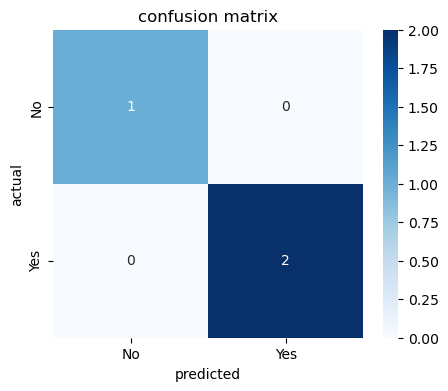

In [4]:
#confusion matrix
cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, xticklabels=class_names, yticklabels=class_names, cmap="Blues", fmt='g')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('confusion matrix')
plt.show()


In [5]:
#node-wise entropy
print("\n Node wise entropy")
for i in range(clf.tree_.node_count):
    print(f"Node {i}: Entropy = {clf.tree_.impurity[i]:.4f}, Samples = {clf.tree_.n_node_samples[i]}")


 Node wise entropy
Node 0: Entropy = 0.9457, Samples = 11
Node 1: Entropy = 0.0000, Samples = 3
Node 2: Entropy = 1.0000, Samples = 8
Node 3: Entropy = 0.8113, Samples = 4
Node 4: Entropy = 1.0000, Samples = 2
Node 5: Entropy = 0.0000, Samples = 1
Node 6: Entropy = 0.0000, Samples = 1
Node 7: Entropy = 0.0000, Samples = 2
Node 8: Entropy = 0.8113, Samples = 4
Node 9: Entropy = 0.0000, Samples = 2
Node 10: Entropy = 1.0000, Samples = 2
Node 11: Entropy = 0.0000, Samples = 1
Node 12: Entropy = 0.0000, Samples = 1


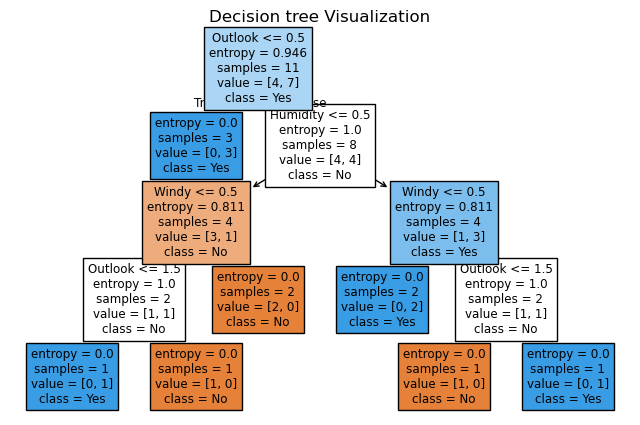

In [6]:
plt.figure(figsize=(8,5))
plot_tree(clf, feature_names=features_names, class_names=class_names, filled=True, impurity=True)
plt.title("Decision tree Visualization")
plt.show()


In [10]:
#text tree representation
tree_rules = export_text(clf, feature_names=features_names)
print("\n Decision Tree Rules:\n")
print(tree_rules)



 Decision Tree Rules:

|--- Outlook <= 0.50
|   |--- class: 1
|--- Outlook >  0.50
|   |--- Humidity <= 0.50
|   |   |--- Windy <= 0.50
|   |   |   |--- Outlook <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- Outlook >  1.50
|   |   |   |   |--- class: 0
|   |   |--- Windy >  0.50
|   |   |   |--- class: 0
|   |--- Humidity >  0.50
|   |   |--- Windy <= 0.50
|   |   |   |--- class: 1
|   |   |--- Windy >  0.50
|   |   |   |--- Outlook <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- Outlook >  1.50
|   |   |   |   |--- class: 1



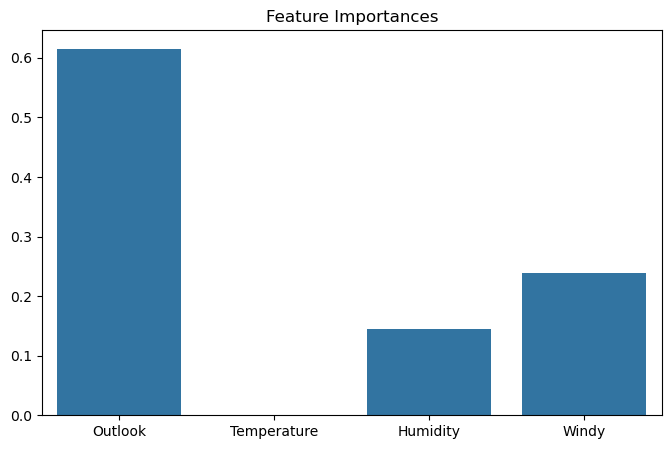

In [11]:
importances = clf.feature_importances_
plt.figure(figsize=(8,5))
sns.barplot(x=features_names, y=importances)
plt.title("Feature Importances")
plt.show()